# Saving data 
In this example, we use several of file formats which FlowStructs can be saved as. The main file format that data can be saved as is `hdf5`. The purpose of this is so FlowStructs can be read at a later time and is not mean to be accessed independently of `flowpy2`. Currently, files can also be read to and from netCDF4. If up to 3D, the data can be viewed in Paraview. Reading external files from netCDF has not been tested although potentially could be introduced at a later date.

In [13]:
# Same data as basic.ipynb
import flowpy2 as fp2
import numpy as np
import os

# First CoordStruct
coord_dict = {'x':np.arange(100, dtype='f8'),
              'y':np.arange(200, dtype='f8'),
              'z':np.arange(150, dtype='f8')}

cs = fp2.CoordStruct('Cartesian',
                     coord_dict)

# construct arbitrary data array
data = cs['x'][:,None,None] + cs['y'][:,None] + cs['z']
data1 = np.stack([data, data*2, data*3])

# create flow struct
fs = fp2.FlowStructND(cs, data1, comps=['u', 'v', 'w'])

In [14]:
# create file name
fn = "data.h5"

# save data
fs.to_hdf(fn, mode='w')

# read data

fs1 = fp2.FlowStructND.from_hdf(fn)

os.remove(fn)

assert fs == fs1

In [15]:
# create file name netcdf4
fn = "data.nc"

# save data
fs.to_netcdf(fn, mode='w')

# read data

fs1 = fp2.FlowStructND.from_netcdf(fn)

assert fs == fs1

In [16]:
# read netcdf4 file in pyvista
import pyvista as pv
import vtk

# Appears reading netcdf cannot be done in pyvista
# create vtkImageData and pass to pyvista

reader = vtk.vtkNetCDFCFReader()
reader.SetFileName(fn)
reader.UpdateMetaData()
reader.Update()

grid = reader.GetOutput()

data = pv.ImageData(grid)

data.point_data

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    u                       float64    (3000000,)
    v                       float64    (3000000,)
    w                       float64    (3000000,)

/home/mfalcone/data/SOFTWARE/miniconda3/envs/flowpy2/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


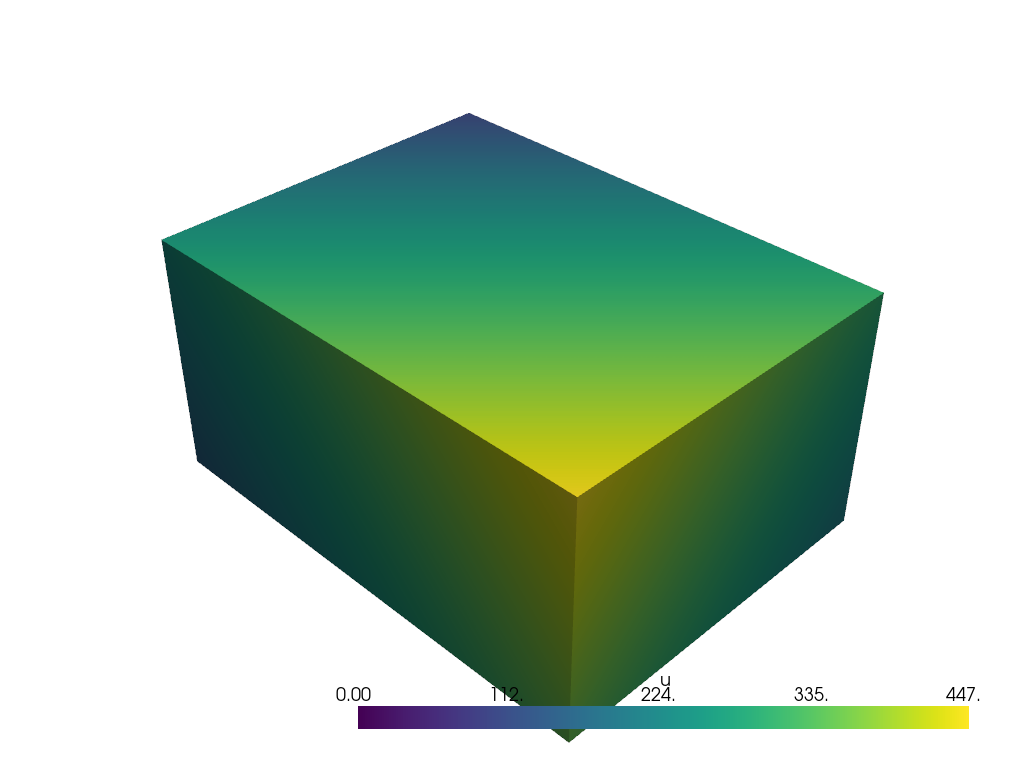

In [17]:
# Plot u component
p = pv.Plotter()

p.add_mesh(data,
           scalars='u')

p.show()
os.remove(fn)